## Code submission

If you would like to use Jupyter (perhaps the easiest way), just submit the notebook file to bCourses. Name it lastname_firstname_(Homework#).ipynb. For example, obama_barack_1.ipynb. This applies to the case if you **only** have a notebook file.

If you use MATLAB or Julia/Python (not the notebook), **or** if you have multiple files, name your programs as p(Homework#)_(Problem#).m. For instance, for homework 1, problem 2, name it as p1_2.m (or p1_2.jl,p1_2.py). Then **zip everything** into a single file lastname_firstname_(Homework#).zip, and submit the zip file to bCourses. For example, obama_barack_1.zip.

For proof-related problems, type your solution using **LaTeX (no other format is accepted)**. You do not need to write down every step of the derivation, but make sure the logic is clear and understandable.

For implementation based problems, the problem description may not include all the information for the answer to be uniquely defined. For instance, your answer might depend on the choice of the mesh size. This is OK.

## Problem 1

Derive explicitly the four-step Adams-Moulton method.

We know that four-step Adams-Moulton is of the form 
$$
u_{n+4} - u_{n+3} = h \sum_{i=0}^{4}\beta_kf_k,
$$
where $f_{k+i} \equiv f(u_{k+i}, t_{k+i})$.
We use Lagrange polynomial $P_i(t)$ to get $\beta_k$ using $\int_{t_{n+3}}^{t_{n+4}}P_i(s)ds$.
As such, we have
$$\begin{equation} \label{eq10}
\begin{split} 
P_0(t) &= \frac{(t-t_{n+4})(t-t_{n+3})(t-t_{n+2})(t-t_{n+1})}{(t_{n}-t_{n+4})(t_{n}-t_{n+3})(t_{n}-t_{n+2})(t_{n}-t_{n+1})} \\
P_1(t) &= \frac{(t-t_{n+4})(t-t_{n+3})(t-t_{n+2})(t-t_{n})}{(t_{n+1}-t_{n+4})(t_{n+1}-t_{n+3})(t_{n+1}-t_{n+2})(t_{n+1}-t_{n})} \\
P_2(t) &= \frac{(t-t_{n+4})(t-t_{n+3})(t-t_{n+1})(t-t_{n})}{(t_{n+2}-t_{n+4})(t_{n+2}-t_{n+3})(t_{n+2}-t_{n+1})(t_{n+2}-t_{n})} \\
P_3(t) &= \frac{(t-t_{n+4})(t-t_{n+2})(t-t_{n+1})(t-t_{n})}{(t_{n+3}-t_{n+4})(t_{n+3}-t_{n+2})(t_{n+3}-t_{n+2})(t_{n+3}-t_{n})} \\
P_4(t) &= \frac{(t-t_{n+3})(t-t_{n+2})(t-t_{n+1})(t-t_{n})}{(t_{n+4}-t_{n+3})(t_{n+4}-t_{n+2})(t_{n+4}-t_{n+2})(t_{n+4}-t_{n})} \\
\end{split}
\end{equation}$$
for our Lagrange polynomials. Integrating for $\beta_k$, we get
$$\begin{equation} \label{eq11}
\begin{split} 
\beta_0 = \int_{t_{n+3}}^{t_{n+4}}P_0(t)dt &= \int_{t_{n+3}}^{t_{n+4}} \frac{(t-t_{n+4})(t-t_{n+3})(t-t_{n+2})(t-t_{n+1})}{(t_{n}-t_{n+4})(t_{n}-t_{n+3})(t_{n}-t_{n+2})(t_{n}-t_{n+1})}dt = \frac{1}{24h^4}\frac{-19h^5}{30} = \frac{-19h}{720} \\
\beta_1 = \int_{t_{n+3}}^{t_{n+4}}P_1(t)dt &= \int_{t_{n+3}}^{t_{n+4}} \frac{(t-t_{n+4})(t-t_{n+3})(t-t_{n+2})(t-t_{n})}{(t_{n+1}-t_{n+4})(t_{n+1}-t_{n+3})(t_{n+1}-t_{n+2})(t_{n+1}-t_{n})}dt = \frac{1}{-6h^4}\frac{-53h^5}{60} = \frac{53h}{360} \\
\beta_2 = \int_{t_{n+3}}^{t_{n+4}}P_2(t)dt &= \int_{t_{n+3}}^{t_{n+4}} \frac{(t-t_{n+4})(t-t_{n+3})(t-t_{n+1})(t-t_{n})}{(t_{n+2}-t_{n+4})(t_{n+2}-t_{n+3})(t_{n+2}-t_{n+1})(t_{n+2}-t_{n})}dt = \frac{1}{4h^4}\frac{-22h^5}{15} = \frac{-22h}{60} \\
\beta_3 = \int_{t_{n+3}}^{t_{n+4}}P_3(t)dt &= \int_{t_{n+3}}^{t_{n+4}} \frac{(t-t_{n+4})(t-t_{n+2})(t-t_{n+1})(t-t_{n})}{(t_{n+3}-t_{n+4})(t_{n+3}-t_{n+2})(t_{n+3}-t_{n+2})(t_{n+3}-t_{n})}dt = \frac{1}{-6h^4}\frac{-323h^5}{60} = \frac{323h}{360} \\
\beta_4 = \int_{t_{n+3}}^{t_{n+4}}P_4(t)dt &= \int_{t_{n+3}}^{t_{n+4}} \frac{(t-t_{n+3})(t-t_{n+2})(t-t_{n+1})(t-t_{n})}{(t_{n+4}-t_{n+3})(t_{n+4}-t_{n+2})(t_{n+4}-t_{n+2})(t_{n+4}-t_{n})}dt = \frac{1}{24h^4}\frac{251h^5}{30} = \frac{251h}{720}. \\
\end{split}
\end{equation}$$
We can take out the $h$ from each coefficient and combine them, resulting in
$$
u_{n+4} - u_{n+3} = \frac{h}{720}[251f_{n+4}+646f_{n+3}-264f_{n+2}+106f_{n+1}-19f_{n}],
$$
the AM4 scheme.

## Problem 2

The $r$-step Nystrom method is given as follows: Replace $f(u(t),t)$ in the exact formulation below

$$u(t_{n+r})-u(t_{n+r-2}) = \int_{t_{n+r-2}}^{t_{n+r}} f(u(t),t) dt$$

by a Lagrange polynomial interpolating at $f_{n},\ldots,f_{n+r}$, where $f_{n+s}\equiv f(u_{n+s},t_{n+s})$. The explicit scheme similar to Adams-Bashforth method is called the Nystrom method.  The implicit scheme similar to Adams-Moulton method is called the Milne method.

a) Derive the Nystrom method with $r=1$ and $r=2$. Prove that both result in the same method, and prove that the LTE is of order $O(h^3)$.

b) Derive the Milne method with $r=2$, and prove that the LTE is of order $O(h^5)$.


a) For $r = 1$, we have $$u(t_{n+1}) - u(t_{n-1}) = \int_{t_{n-1}}^{t_{n+1}} f(u(t),t) dt.$$ We use Lagrange polynomial interpolation, with $$P(t) = f_n \rightarrow u_{n+1} - u_{n-1} = \int_{t_{n-1}}^{t_{n+1}} 1 * f_n dt = f_n \int_{t_{n-1}}^{t_{n+1}} dt = 2hf_n.$$
For $r = 2$, we have $$u(t_{n+2}) - u(t_{n}) = \int_{t_{n}}^{t_{n+2}} f(u(t),t) dt.$$ 
Again using Lagrange polynomial interpolation, we have 
$$P(t) = f_{n+1}\frac{t-t_n}{t_{n+1}-t_n} + f_n \frac{t-t_{n+1}}{t_n-t_{n+1}},$$ yielding 
$$\begin{equation} \label{eq1}
\begin{split} 
u_{n+2} - u_{n} &= \int_{t_{n}}^{t_{n+2}} f_{n+1}\frac{t-t_n}{t_{n+1}-t_n} + f_{n} \frac{t-t_{n+1}}{t_n-t_{n+1}} dt \\
&= \frac{f_{n+1}}{t_{n+1}-t_n} \int_{t_{n}}^{t_{n+2}} t-t_n dt + \frac{f_{n}}{t_n-t_{n+1}} \int_{t_{n}}^{t_{n+2}} t-t_{n+1} dt \\ 
&= \frac{f_{n+1}}{t_{n+1}-t_n} [\frac{1}{2}(t-t_{n})^2]|_{t_n}^{t_{n+2}} + \frac{f_{n}}{t_n-t_{n+1}} [\frac{1}{2}(t-t_{n+1})^2]|_{t_n}^{t_{n+2}} \\
&= \frac{f_{n+1}}{h}2h^2 = 2hf_{n+1},
\end{split}
\end{equation}$$
which is the same as above.\
For LTE, we Taylor expand to have
$$\begin{equation} \label{eq2}
\begin{split} 
\tau_{n} &= u_{n+1} - u_{n-1} - 2hf_n \\
&= [u(t_n) + hu'(t_n) + \frac{h^2}{2}u''(t_n) - u(t_n) + hu'(t_n) - \frac{h^2}{2}u''(t_n) + O(h^3)] - 2hu'(t_n) \\
&= [2hu'(t_n) + O(h^3)] - 2hu'(t_n) \\
&= O(h^3)
\end{split}
\end{equation}$$
as desired. \
b) For $r = 2$, we have $$u(t_{n+2}) - u(t_{n}) = \int_{t_{n}}^{t_{n+2}} f(u(t),t) dt.$$ We use Lagrange polynomial interpolation again, however we include $u(t_{n+2})$. Thus we have $$P(t) = f_{n+2}\frac{(t-t_{n+1})(t-t_{n})}{(t_{n+2}-t_{n+1})(t_{n+2}-t_n)} + f_{n+1}\frac{(t-t_{n+2})(t-t_{n})}{(t_{n+1}-t_{n+2})(t_{n+1}-t_n)} + f_n\frac{(t-t_{n+2})(t-t_{n+1})}{(t_{n}-t_{n+2})(t_{n}-t_{n+1})},$$ and so we have
$$\begin{equation} \label{eq3}
\begin{split} 
u_{n+2} - u_{n} &= \int_{t_{n}}^{t_{n+2}} f_{n+2}\frac{(t-t_{n+1})(t-t_{n})}{(t_{n+2}-t_{n+1})(t_{n+2}-t_n)} + f_{n+1}\frac{(t-t_{n+2})(t-t_{n})}{(t_{n+1}-t_{n+2})(t_{n+1}-t_n)} + f_n\frac{(t-t_{n+2})(t-t_{n+1})}{(t_{n}-t_{n+2})(t_{n}-t_{n+1})} dt \\
&= \frac{f_{n+2}}{2h^2}\int_{t_{n}}^{t_{n+2}}(t-t_{n+1})(t-t_{n})dt + \frac{f_{n+1}}{-h^2}\int_{t_{n}}^{t_{n+2}}(t-t_{n+2})(t-t_{n})dt + \frac{f_{n}}{2h^2}\int_{t_{n}}^{t_{n+2}}(t-t_{n+2})(t-t_{n+1})dt \\
&= \frac{f_{n+2}}{2h^2}\int_{t_{n}}^{t_{n}+2h}(t-t_{n}-h)(t-t_{n})dt + \frac{f_{n+1}}{-h^2}\int_{t_{n}}^{t_{n}+2h}(t-t_{n}-2h)(t-t_{n})dt + \frac{f_{n}}{2h^2}\int_{t_{n}}^{t_{n}+2h}(t-t_{n}-2h)(t-t_{n}-h)dt \\
&= \frac{f_{n+2}}{2h^2}\frac{2h^3}{3} + \frac{f_{n+1}}{-h^2}\frac{-4h^3}{3} + \frac{f_{n}}{2h^2}\frac{2h^3}{3} \\ 
&= \frac{h}{3}[f_{n+2} + 4f_{n+1} + f_{n}].
\end{split}
\end{equation}$$
To show LTE, we once again Taylor expand, yielding
$$\begin{equation} \label{eq4}
\begin{split} 
\tau_{n} &= u_{n+1} - u_{n-1} - \frac{h}{3}[f_{n+1} + 4f_{n} + f_{n-1}] \\
&= [u(t_n) + hu'(t_n) + \frac{h^2}{2}u''(t_n) + \frac{h^3}{6}u'''(t_n) + \frac{h^4}{24}u^{(4)}(t_n) - u(t_n) + hu'(t_n) - \frac{h^2}{2}u''(t_n) + \frac{h^3}{6}u'''(t_n) - \frac{h^4}{24}u^{(4)}(t_n)] - \frac{h}{3}[u'(t_{n+1}) + 4u'(t_{n}) + u'(t_{n-1})] + O(h^5)\\
&= [2hu'(t_n) + \frac{h^3}{3}u'''(t_n)] - \frac{h}{3}[u'(t_n) + hu''(t_n) + \frac{h^2}{2}u'''(t_n) + \frac{h^3}{6}u^{(4)}(t_n) + 4u'(t_{n}) + u'(t_n) - hu''(t_n) + \frac{h^2}{2}u'''(t_n) - \frac{h^3}{6}u^{(4)}(t_n)] + O(h^5) \\
&= [2hu'(t_n) + \frac{h^3}{3}hu'''(t_n)] - \frac{h}{3}[6u'(t_n) + h^2u'''(t_n)] + O(h^5)\\
&= O(h^5)
\end{split}
\end{equation}$$
as desired.

## Problem 3

The Rabi oscillation in quantum physics can be modeled by the following ODEs
$$
\begin{split}
i\partial_t u_1(t) &= \Omega \cos (\omega t) u_2(t),\\
i\partial_t u_2(t) &= \Omega_0 u_2(t) + \Omega \cos (\omega t) u_1(t).
\end{split}
$$

This model describes the transition of an electron from state 1 to state 2 under an external electric field $\mathcal{E}(t)=\Omega \cos(\omega t)$. $u_1(t),u_2(t)\in \mathbb{C}$, and $\Omega_0$ is the energy gap between the two states.
"

Given Initial condition $u_1(0)=1,u_2(0)=0$, and $\Omega_0=2\pi,\Omega=1.0$.  Implement the 4th order Runge-Kutta method (rk4) which returns the full trajectory of the two components of $u$ as $u[1,:]$ and $u[2,:]$.

a) Use the RK4 scheme with $\Delta t = 0.1$ to solve this equation and plot out the trajectory of $|u_1(t)|^2$,$|u_2(t)|^2$ on the interval $[0,10\pi]$ for $\omega=\pi$. Do the same calculation for $\omega=2\pi$ and you should observe the resonance behavior (i.e. $|u_2|$ can reach 1.0 at some t).

b) Prove that $A(t)=|u_1(t)|^2+|u_2(t)|^2$ is a conserved quantity along the trajectory.

c) Plot $A(t)-1$ obtained from the RK4 scheme using $h=0.1$ and $0.01$, respectively. 

b) We show $A'(t) = 0$ as follows: 
$$\begin{equation} \label{eq34}
\begin{split}
A(t) &= |u_1(t)|^2 + |u_2(t)|^2 \\
&= u_1(t)\overline{u_1(t)} + u_2(t)\overline{u_2(t)} \\
\rightarrow A'(t) &= u_1'(t)\overline{u_1(t)} + u_1(t)\overline{u_1'(t)} + u_2'(t)\overline{u_2(t)} + u_2(t)\overline{u_2'(t)} \\
&= \frac{1}{i}\Omega \cos (\omega t) u_2(t)\overline{u_1(t)} + iu_1(t)\overline{\Omega \cos (\omega t) u_2(t)} + \frac{1}{i}(\Omega_0 u_2(t) + \Omega \cos (\omega t) u_1(t))\overline{u_2(t)} + iu_2(t)\overline{(\Omega_0 u_2(t) + \Omega \cos (\omega t) u_1(t))} \\
&= \frac{1}{i}\Omega \cos (\omega t) u_2(t)\overline{u_1(t)} + iu_1(t)\Omega \cos (\omega t) \overline{u_2(t)} + \frac{1}{i}(\Omega_0 u_2(t) + \Omega \cos (\omega t) u_1(t))\overline{u_2(t)} + iu_2(t)(\Omega_0 \overline{u_2(t)} + \Omega \cos (\omega t) \overline{u_1(t)}) \\
&= i \Omega \cos (\omega t) (u_1(t)\overline{u_2(t)} - \overline{u_1(t)}u_2(t)) + i(\Omega_0 \overline{u_2(t)}u_2(t) + \Omega \cos (\omega t) \overline{u_1(t)}u_2(t) - \Omega_0 u_2(t)\overline{u_2(t)} - \Omega \cos (\omega t) u_1(t)\overline{u_2(t)}) \\
&= i \Omega \cos (\omega t) (u_1(t)\overline{u_2(t)} - \overline{u_1(t)}u_2(t)) + i\Omega \cos (\omega t)(\overline{u_1(t)}u_2(t) -  u_1(t)\overline{u_2(t)})\\
&= i \Omega \cos (\omega t) (u_1(t)\overline{u_2(t)} - \overline{u_1(t)}u_2(t) + \overline{u_1(t)}u_2(t) -  u_1(t)\overline{u_2(t)}) \\
&= 0.
\end{split}
\end{equation}$$
Thus $A(t)$ is conserved since $A'(t) = 0$.

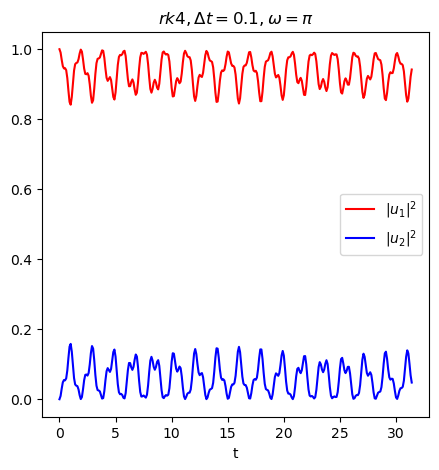

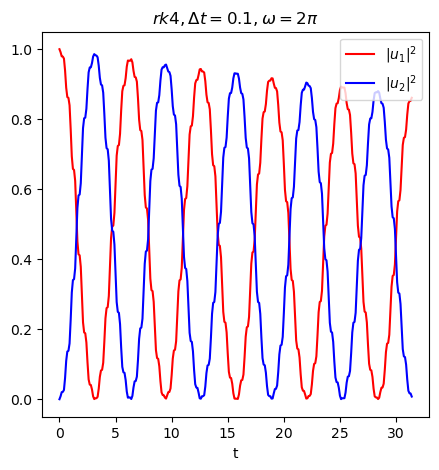

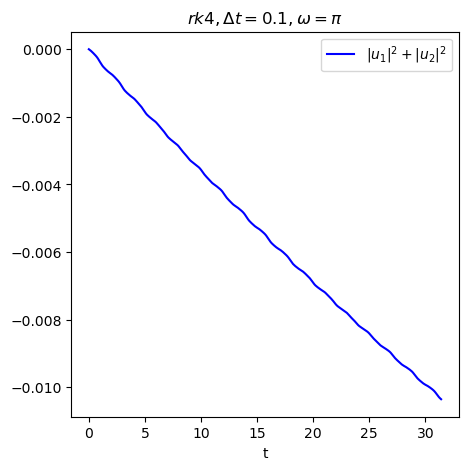

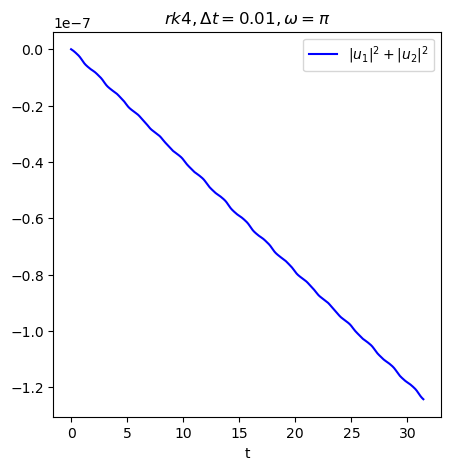

PyObject <matplotlib.legend.Legend object at 0x00000000653DB340>

In [13]:
using LinearAlgebra 

function func(u,t,Omega,Omega0,w)
    rv = ones(ComplexF64, 2,)
    rv[1] = Omega*cos(w*t)*u[2]/im
    rv[2] = (Omega0*u[2] + Omega*cos(w*t)*u[1])/im
    return rv
end

function rk4(N,T,u0,Omega,Omega0,w,dt)
    u = zeros(ComplexF64, N+1, length(u0))'
    u[:,1] = u0;
    t = collect(0:dt:T)
    for i = 1:N
        k1 = dt*func(u[:,i], t[i], Omega, Omega0, w)
        k2 = dt*func(u[:,i] + k1/2, t[i] + dt/2, Omega, Omega0, w)
        k3 = dt*func(u[:,i] + k2/2, t[i] + dt/2, Omega, Omega0, w)
        k4 = dt*func(u[:,i] + k3, t[i] + dt, Omega, Omega0, w)
        u[:,i+1] = u[:,i] + (k1 + 2*k2 + 2*k3 + k4)/6
    end
    return u
end


using PyPlot

##############################
T = 10.0*pi
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
Omega = 1.0
Omega0 = 2*pi
w = pi
u0 = [1.0,0.0]

# RK4
u = rk4(N,T,u0,Omega,Omega0,w,dt)
figure(1,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2),"r-",label=L"|u_1|^2")
plot(t,vec(abs.(u[2,:]).^2),"b-",label=L"|u_2|^2")
xlabel("t")
legend()
title(L"rk4,\Delta t=0.1,\omega=\pi")

##############################
T = 10.0*pi
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
Omega = 1.0
Omega0 = 2*pi
w = 2*pi
u0 = [1.0,0.0]

# RK4
u = rk4(N,T,u0,Omega,Omega0,w,dt)
figure(2,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2),"r-",label=L"|u_1|^2")
plot(t,vec(abs.(u[2,:]).^2),"b-",label=L"|u_2|^2")
xlabel("t")
legend()
title(L"rk4,\Delta t=0.1,\omega=2\pi")

##############################
T = 10.0*pi
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
Omega = 1.0
Omega0 = 2*pi
w = pi
u0 = [1.0,0.0]

# RK4
u = rk4(N,T,u0,Omega,Omega0,w,dt)
figure(3,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2+abs.(u[2,:]).^2).-1,"b-",label=L"$|u_1|^2+|u_2|^2$")
xlabel("t")
title(L"rk4,\Delta t=0.1,\omega=\pi")
legend()

##############################
T = 10.0*pi
dt = 0.01
N = round(Int64,T/dt)
t = collect(0:N)*dt
Omega = 1.0
Omega0 = 2*pi
w = pi
u0 = [1.0,0.0]

# RK4
u = rk4(N,T,u0,Omega,Omega0,w,dt)
figure(4,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2+abs.(u[2,:]).^2).-1,"b-",label=L"$|u_1|^2+|u_2|^2$")
xlabel("t")
title(L"rk4,\Delta t=0.01,\omega=\pi")
legend()

In [2]:
# k=dt/dx^2

# t_pts = collect(0:dt:1)
# x_dir = vcat(collect(1:length(x_pts)), ones(length(t_pts)))
# t_dir = vcat(ones(length(x_pts)), collect(1:length(t_pts)))
# pts = vcat(x_pts, t_pts)
# A = sparse(t_dir, x_dir, pts)

# A[2,:] = funcu(x_pts)
# print(size(A))
# for i in collect(3:length(t_dir))
#     for j in collect(1:length(x_dir))
#         A[i,j] = A[i-1,j] + k*(A[i+1][j] - 2A[i][j] + A[i-1][j])
#     end
# end

## Problem 4


Consider the heat equation in 1D with periodic boundary conditions

$$u_t(x,t) = u_{xx}(x,t),\quad x\in [0,2\pi],$$

$$u(x,0)=e^{-5(x-\pi)^2}, \quad u(0,t)=u(2\pi,t), u_x(0,t)=u_x(2\pi,t)$$

Here $\varepsilon = 1.0$. Use the central finite difference scheme to discretize $u_{xx}(x,t)$, with a uniform grid spacing $\Delta x=2\pi/100$, i.e.

$$u_{xx}(x_i,t_n)\approx \frac{u(x_i+\Delta x,t_n)-2u(x_i,t_n)+u(x_i-\Delta x,t_n)}{\Delta x^2}.$$



Obtain the solution $u(x,T)$ at $T=1.0$ using the following methods.

a) Implement a `ForwardEuler` method, using the forward Euler for time discretization and $h =0.001$. What would happen if you use a time step $h=0.01$?

b) Implement a `Trapezoid` method, using a trapezoidal rule for time discretization and use $h=0.1$. Since the equation is linear, you can solve a linear equation to treat this implicit scheme.

c) Implement a `TrapezoidAB2` method, which uses an adaptive time stepping strategy (with the "Milne device") propagated by the trapezoidal rule, with its error estimated on-the-fly from the Adams-Bashforth 2nd order scheme.  The initial time step is $h=0.001$. Plot out the history of the size step along the history of the simulation. 

Read [Ise] Chap 6.2 if needed for more information. Some "sloppiness" in the interpolation procedure can be tolerated if it makes the implementation easier.

**Note**: You should implement this example using **sparse matrices** whenever possible. See 

https://docs.julialang.org/en/v1/stdlib/SparseArrays/index.html

for references on sparse linear algebra.


In [6]:
using SparseArrays

function funcu(x)
   return exp.(.-5 .*(x.-pi).^2) 
end

function ForwardEuler(dt,T,u0,A)
    u = copy(u0)
    N = T/dt
    for i = 1:N
        u = u + dt*A*u
    end
    return u
end


T=1
dx=2*pi/100
dt=0.001
x_pts = collect(0:dx:2*pi)
u0 = funcu(x_pts)
rows = vcat(collect(1:100), [100], collect(1:99), collect(2:100), [1])
cols = vcat(collect(1:100), collect(1:100), collect(1:100))
pts = vcat(ones(100)*-2, ones(200)*1)
A = 1/dx^2*sparse(rows, cols, pts)
smallh = ForwardEuler(dt,T,u0,A)
dt=0.01
bigh = ForwardEuler(dt,T,u0,A)
print(smallh)

[0.04163146120307466, 0.04177625268311211, 0.04221039660412847, 0.042933197155810864, 0.04394348056822453, 0.045239574298779124, 0.046819278521635185, 0.04867983053669758, 0.05081786287675403, 0.053229356041709544, 0.055909586925980956, 0.058853074126810394, 0.06205352142553649, 0.06550376081890243, 0.06919569654165572, 0.07312025156360893, 0.07726731806284282, 0.0816257133709913, 0.08618314285600814, 0.09092617115227711, 0.09584020306754844, 0.10090947539150028, 0.10611706070266266, 0.11144488412032982, 0.11687375377764977, 0.12238340560343361, 0.1279525627958647, 0.13355901015405272, 0.1391796832064326, 0.1447907718417975, 0.15036783791294112, 0.15588594604831424, 0.16131980667771584, 0.16664393005782294, 0.17183278987626577, 0.17686099482280254, 0.1817034663465854, 0.1863356206729043, 0.19073355303417472, 0.19487422198091606, 0.1987356315811805, 0.20229700929294758, 0.2055389773044194, 0.2084437151823543, 0.21099511174834462, 0.21317890421641583, 0.21498280277101148, 0.2163965989402

In [22]:
function Trapezoid(dt,T,u0)
    N = T/dt
    u = copy(u0)
    for i = 1:N
        u = (sparse(I, 100, 100)-dt/2*A)\((sparse(I, 100, 100)+dt/2*A)*u)
    end
    return u
end

T=1
dx=2*pi/100
dt=0.1
x_pts = collect(0:dx:2*pi)
u0 = funcu(x_pts)
rows = vcat(collect(1:100), [100], collect(1:99), collect(2:100), [1])
cols = vcat(collect(1:100), collect(1:100), collect(1:100))
pts = vcat(ones(100)*-2, ones(200)*1)
A = 1/dx^2*sparse(rows, cols, pts)
Trapezoid(dt,T,u0,A)

100-element Vector{Float64}:
 0.04149921719435457
 0.04164512962797375
 0.04208261971586063
 0.04281094224865331
 0.043828843337668316
 0.04513454269316006
 0.04672570895256406
 0.048599428127755064
 0.0507521652032177
 0.05317971890891439
 0.05587716979013325
 0.05883882200486222
 0.06205813990768221
 ⋮
 0.062058139907682296
 0.058838822004862304
 0.0558771697901333
 0.053179718908914445
 0.05075216520321775
 0.04859942812775512
 0.046725708952564116
 0.045134542693160126
 0.04382884333766839
 0.042810942248653366
 0.04208261971586066
 0.04164512962797376

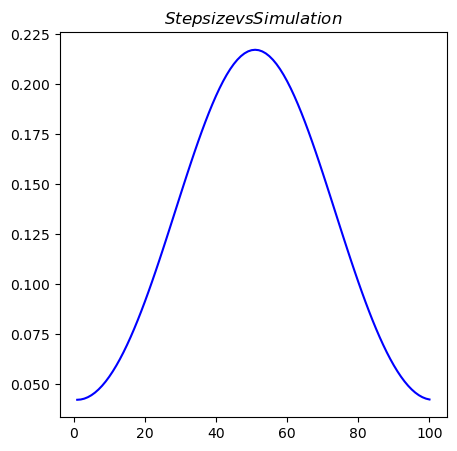

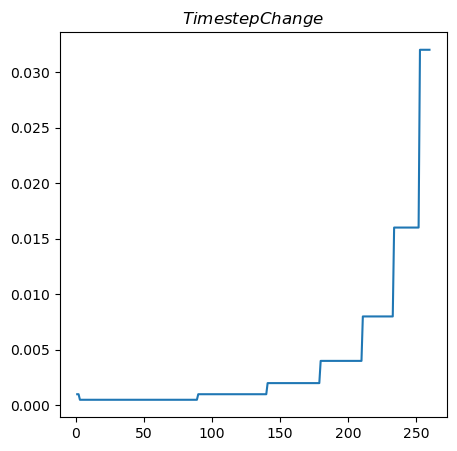

PyObject Text(0.5, 1.0, '$Timestep Change$')

In [12]:
#function AB2(dt,T,u0,A)
#    N = T/dt
#     u = copy(u0)
#     u1 = Trapezoid(dt,T,u0,A)
#     for i = 1:N
#         u1, u = u1 + h/2*(3*A*u1 - A*u), u1
#     end
#     return u1
# end

function TrapezoidAB2(dt,T,u0,A,delta)
    t = 0
    cnt = 2
    dt_arr = [dt]
    u = ones(100,1)
    u[:,1] = copy(u0)
    u = hcat(u, (sparse(I, 100, 100)-dt/2*A)\((sparse(I, 100, 100)+dt/2*A)*u[:,1]))
    t += dt
    dt_arr = vcat(dt_arr, dt)
    curr = u[:,cnt]
    u1 = u[:,1]
    u2 = u[:,2]
    ab2 = u2 + dt/2*(3*A*u2 - A*u1)
    while t <= T
        temp = (sparse(I, 100, 100)-dt/2*A)\((sparse(I, 100, 100)+dt/2*A)*curr)
        tau = 1/6*norm(temp - ab2)
        if tau > delta*dt
            dt = dt/2
            u1 = (sparse(I, 100, 100)-dt/2*A)\((sparse(I, 100, 100)+dt/2*A)*u1)
            ab2 = u2 + dt/2*(3*A*u2 - A*u1)
        elseif tau <= 1/10*delta*dt
            t += dt
            dt = 2dt
            dt_arr = vcat(dt_arr, dt)
            u1 = u[:,cnt-1]
            cnt += 1
            curr = temp
            u = hcat(u,curr)
            u2 = curr
            ab2 = u2 + dt/2*(3*A*u2 - A*u1)
        else
            t += dt
            dt_arr = vcat(dt_arr, dt)
            cnt += 1
            u1 = u2
            curr = temp
            u = hcat(u,curr)
            u2 = curr
            ab2 = u2 + dt/2*(3*A*u2 - A*u1)
        end
    end
    return u, dt_arr, cnt
end

T=1
dx=2*pi/100
dt=0.001
x_pts = collect(0:dx:2*pi)
u0 = funcu(x_pts)
rows = vcat(collect(1:100), [100], collect(1:99), collect(2:100), [1])
cols = vcat(collect(1:100), collect(1:100), collect(1:100))
pts = vcat(ones(100)*-2, ones(200)*1)
A = 1/dx^2*sparse(rows, cols, pts)
u,dt,n = TrapezoidAB2(dt,T,u0,A,1e-3)

figure(5,figsize=(5,5))
plot(collect(1:100), u[:,n], "b-")
title(L"Stepsize vs Simulation")

figure(6,figsize=(5,5))
plot(collect(1:length(dt)), dt)
title(L"Timestep Change")

## Problem 5

Consider a general 2-stage Runge-Kutta method with the following Butcher table
$$
\begin{array}{c|cc} &a_{11} & a_{12}\\   &a_{21} & a_{22}\\ \hline & b_1 & b_2 \end{array}
$$
applied to a vector IVP
$$
\dot{u}(t)=f(u(t)), \quad u(0)=u_0, \quad u_0\in\mathbb{R}^d.
$$
Write down the formulation of the local truncation error up to $\mathcal{O}(h^4)$ (the $h^4$ term does not need to be written down explicitly, but if you want, please feel free to do so). Observe how the order condition diagrams naturally emerge. 


**Hint:** Consider a mapping $f:\mathbb{R}^d\to\mathbb{R}^d$. Its derivatives are denoted by
$$
(D f)_{q}^{p}=\frac{\partial f^{p}}{\partial x_{q}},\quad\left(D^{2} f\right)_{qr}^{p}=\frac{\partial^{2} f^{p}}{\partial x_{q} \partial x_{r}},\quad\cdots
$$
The component-wise form of the Taylor expansion reads
$$
\begin{align*}
f^p(\mathbf{x})=&f^p\left(\mathbf{x}_{0}\right)+\sum_{q=1}^{d}(D f)^p_{q}\left(\mathbf{x}_{0}\right)\left(\mathbf{x}-\mathbf{x}_{0}\right)_{q}+
\frac{1}{2} \sum_{qr=1}^{d}\left(D^{2} f\right)^p_{qr}(\mathbf{x}_0) (\mathbf{x}-\mathbf{x}_0)_{q}(\mathbf{x}-\mathbf{x}_0)_{r}\\
&+\frac{1}{6} \sum_{qrs=1}^{d}\left(D^{3} f\right)^p_{qrs}(\mathbf{x}_0)(\mathbf{x}-\mathbf{x}_0)_{q}(\mathbf{x}-\mathbf{x}_0)_{r}(\mathbf{x}-\mathbf{x}_0)_{s}+\cdots
\end{align*}
$$


We have the equation $\vec{u}_{n+1} = \vec{u}_n + h(b_1k_1+b_2k_2)$, where $k_1 = f(\vec{u}_n\vec{e}+h(a_{11}k_1+a_{12}k_2))$ and $k_2 = f(\vec{u}_n\vec{e}+h(a_{21}k_1+a_{22}k_2))$. Taylor expanding at index $p$, we have for the left hand side
$$\begin{equation} \label{eq15}
\begin{split} 
u(t_{n+1})^p &= u(t_n)^p + h\dot{u}(t_n)^p+\frac{h^2}{2}\ddot{u}(t_n)^p + \frac{h^3}{6}\dddot{u}(t_n)^p + O(h^4) \\
&= u(t_n)^p + hf^p+\frac{h^2}{2}\sum_{q=1}^{d}(Df)^p_qf^q + \frac{h^3}{6}[\sum_{q=1}^{d}(Df)^p_q\sum_{r=1}^{d}(Df)^q_rf^r + \sum_{qr=1}^{d}(D^2f)_{qr}^pf^{q}f^r] +O(h^4).
\end{split}
\end{equation}$$
And on the right side, we have
$$\begin{equation} \label{eq16}
\begin{split} 
u_n^p + h(b_1k_1+b_2k_2)^p &= u(t_n)^p + h(b_1[f^p + h\sum_{q=1}^{d}(Df)_q^p(a_{11}k_1+a_{12}k_2)_q + \frac{h^2}{2}\sum_{qr=1}^{d}{D^2f}^p_{qr}(a_{11}k_1+a_{12}k_2)_q(a_{11}k_1+a_{12}k_2)_r] + b_2[f^p + h\sum_{q=1}^{d}(Df)_q^p(a_{21}k_1+a_{22}k_2)_q + \frac{h^2}{2}\sum_{qr=1}^{d}{D^2f}^p_{qr}(a_{21}k_1+a_{22}k_2)_q(a_{21}k_1+a_{22}k_2)_r]) \\
&= u(t_n)^p + h(b_1[f^p + h\sum_{q=1}^{d}(Df)_q^p (a_{11}[f^q+h\sum_{r=1}^{d}(Df)_r^q(a_{11}f+a_{12}f)_r] + a_{12}[f^q+h\sum_{r=1}^{d}(Df)_r^q(a_{21}f+a_{22}f)_r]) + \frac{h^2}{2} \sum_{qr=1}^{d}(D^2f)^p_{qr}(a_{11}+a_{12})^2f^qf^r] + b_2[f^p + h\sum_{q=1}^{d}(Df)_q^p (a_{21}[f^q+h\sum_{r=1}^{d}(Df)_r^q(a_{11}f+a_{12}f)_r] + a_{22}[f^q+h\sum_{r=1}^{d}(Df)_r^q(a_{21}f+a_{22}f)_r]) + \frac{h^2}{2} \sum_{qr=1}^{d}(D^2f)^p_{qr}(a_{21}+a_{22})^2f^qf^r] \\
&= u(t_n)^p + h(b_1+b_2)f^p + h^2(b_1(a_{11}+a_{12})+b_2(a_{21}+a_{22}))\sum_{q=1}^d(Df)_q^p + h^3(b_1(a_{11}(a_{11}+a_{12})+a_{12}(a_{21}+a_{22}))+b_2(a_{21}(a_{11}+a_{12})+a_{22}(a_{21}+a_{22})))\sum_{q=1}^d(Df)_q^p\sum_{r=1}^{d}(Df)_r^qf^r + \frac{h^3}{2}(b_1(a_{11}+a_{12})^2+b_2(a_{21}+a_{22})^2)\sum_{qr=1}^{d}(D^2f)^p_{qr}f^qf^r
\end{split}
\end{equation}$$
Matching terms for order condition, we have 
$$b_1+b_2 = 1$$
$$b_1(a_{11}+a_{12})+b_2(a_{21}+a_{22}) = \frac{1}{2}$$
$$b_1[a_{11}(a_{11}+a_{12})+a_{12}(a_{21}+a_{22})]+b_2[a_{21}(a_{11}+a_{12})+a_{22}(a_{21}+a_{22})] = \frac{1}{6}$$
$$b_1(a_{11}+a_{12})^2+b_2(a_{21}+a_{22})^2 = \frac{1}{3}.$$